# Implementing the "collisions" NASA EVOLVE model

Kerry N. Wood (kerry.wood@asterism.ai)

June 20, 2022

*resurrected April 10, 2025*

~~~
Johnson, Nicholas L., Paula H. Krisko, J-C. Liou, and Phillip D. Anz-Meador. "NASA's new breakup model of EVOLVE 4.0." Advances in Space Research 28, no. 9 (2001): 1377-1384.
~~~

https://www.sciencedirect.com/science/article/abs/pii/S0273117701004239

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\1368355255E\TEMP\ipykernel_20148\596641497.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
from EVOLVE import evolve_collision

In [3]:
# non-catastrophic collision : 1000kg vs 100kg, 500m/s closing
# note the min_characteristic_length : if you set this too small, the distribution explodes.. (LOTS of particles)
non_catastrophic = evolve_collision( 1000, 100, 
                     [7,0,0], [6.5,0,0],   # 500m/s closing speed...
                     10,1,
                     min_characteristic_length=0.01 )
non_catastrophic.match_mass()
non_catastrophic.catastrophic

Removed 107 objects to enforce mass limit (collision_mass:   50.000 oldmass: 11929.821 / newmass: 1100.000)


False

In [4]:
catastrophic = evolve_collision( 1500, 10, 
                     [7,0,0], [4,4,0],   # 500m/s closing speed...
                     10,1,
                     min_characteristic_length=0.1 )
non_catastrophic.match_mass()
catastrophic.catastrophic

Removed 0 objects to enforce mass limit (collision_mass:   50.000 oldmass: 1100.000 / newmass: 1100.000)


True

In [5]:
non_catastrophic.match_mass()

Removed 0 objects to enforce mass limit (collision_mass:   50.000 oldmass: 1100.000 / newmass: 1100.000)


In [6]:
len(catastrophic.charlens)

1242

In [7]:
non_catastrophic.catastrophic

False

In [8]:
np.sum(catastrophic.mass)

15825.56039156796

In [9]:
np.sum(non_catastrophic.mass)  # this should be less than the mass of the smaller impactor

1099.9999787704355

In [10]:
catastrophic.match_mass()

Removed 145 objects to enforce mass limit (collision_mass: 1510.000 oldmass: 15825.560 / newmass: 1510.000)


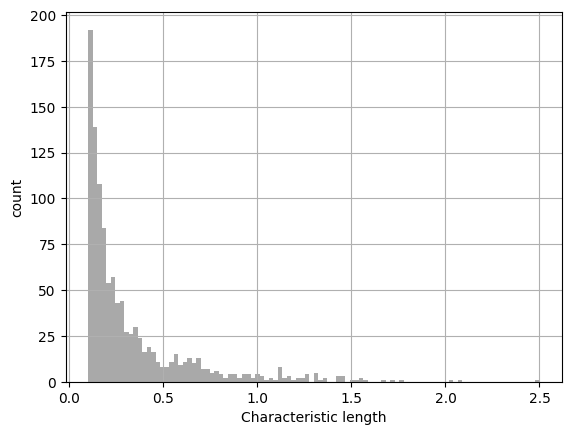

In [11]:
plt.close('all')
_ = plt.hist( catastrophic.charlens, bins=100, color='#A9A9A9' )
plt.ylabel('count')
plt.xlabel('Characteristic length')
plt.grid()

In [12]:
# _ = plt.hist( np.log10( S.am_ratio ),bins=100 )
# np.sum( S.mass )
catastrophic.fragment_count
np.sum( catastrophic.mass )

1509.9999138657668

Text(0.5, 1.0, 'DeltaV')

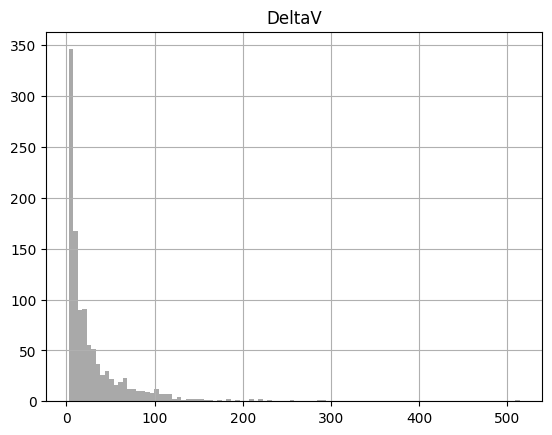

In [13]:
plt.close('all')
_ = plt.hist(catastrophic.dv, bins=100, color='#A9A9A9' )
plt.grid()
plt.title('DeltaV')

Text(0.5, 1.0, 'A/M Ratio')

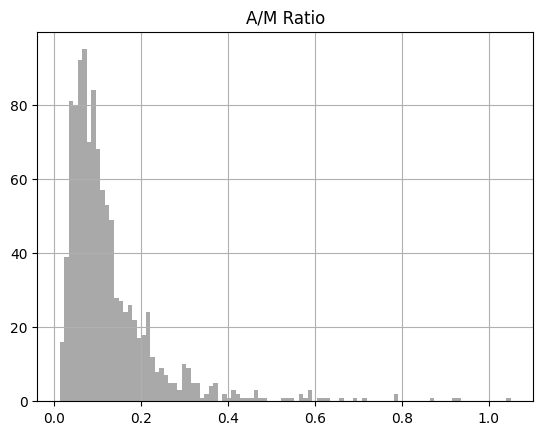

In [14]:
plt.close('all')
_ = plt.hist( catastrophic.am_ratio, bins=100, color='#A9A9A9' )
plt.grid()
plt.title('A/M Ratio')

Text(0.5, 1.0, 'Charlen')

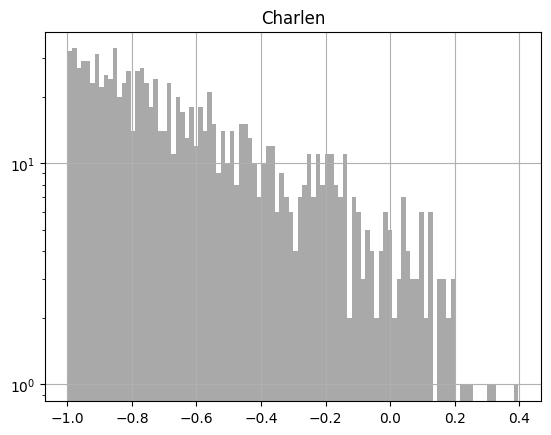

In [15]:
plt.close('all')
_ = plt.hist( np.log10(catastrophic.charlens), log=True,bins=100, color='#A9A9A9' )
plt.grid()
plt.title('Charlen')

In [16]:
def f(lc): return 0.1 * (100**0.75) * (lc **-1.71)

X100 = np.arange(0.0001,10,0.01)

In [17]:
10**0.4

2.51188643150958

In [18]:
Y = f(X)
Y

plt.semilogy(X,Y,'.')

NameError: name 'X' is not defined

In [ ]:
pdfY = np.diff( Y[::-1] )
pdfX = X[::-1][:-1]
plt.loglog( pdfX, pdfY / np.max(Y) )

In [ ]:
def sample( x0, x1, exp, mass):
    s = np.random.uniform()
#     tval =  ( x1**(exp+1) - x0**(exp+1) )* s * 0.1 * (mass**0.75) + x0**(exp+1)
    tval =  ( x1**(exp+1) - x0**(exp+1) )* s   + x0**(exp+1)
    return tval ** 1/(exp+1)

for _ in range(100): 
    X = sample( 0.001,1,-1.71, 1000) 
    print( 10**(X/10))

In [ ]:
10**-162